### Importing libraries

In [5]:
import numpy as np
import pandas as pd
import os
import sklearn
import seaborn as sns

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.display import Image


from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [7]:
df = pd.read_csv(r'Churn data.csv')

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.shape

(3333, 21)

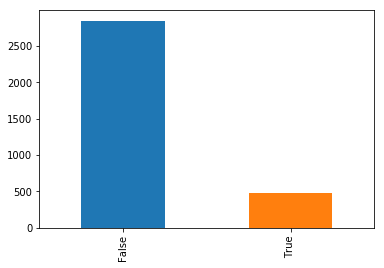

In [12]:
y =df.churn.value_counts()
y.plot(kind='bar')
plt.show()

In [15]:
y_true = df[df['churn'] ==True]
y_true.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [16]:
y_true.shape

(483, 21)

In [25]:
print('Churn percentage = ' + str(y_true.shape[0]/df['churn'].shape[0] * 100))

Churn percentage = 14.491449144914492


In [26]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn by state

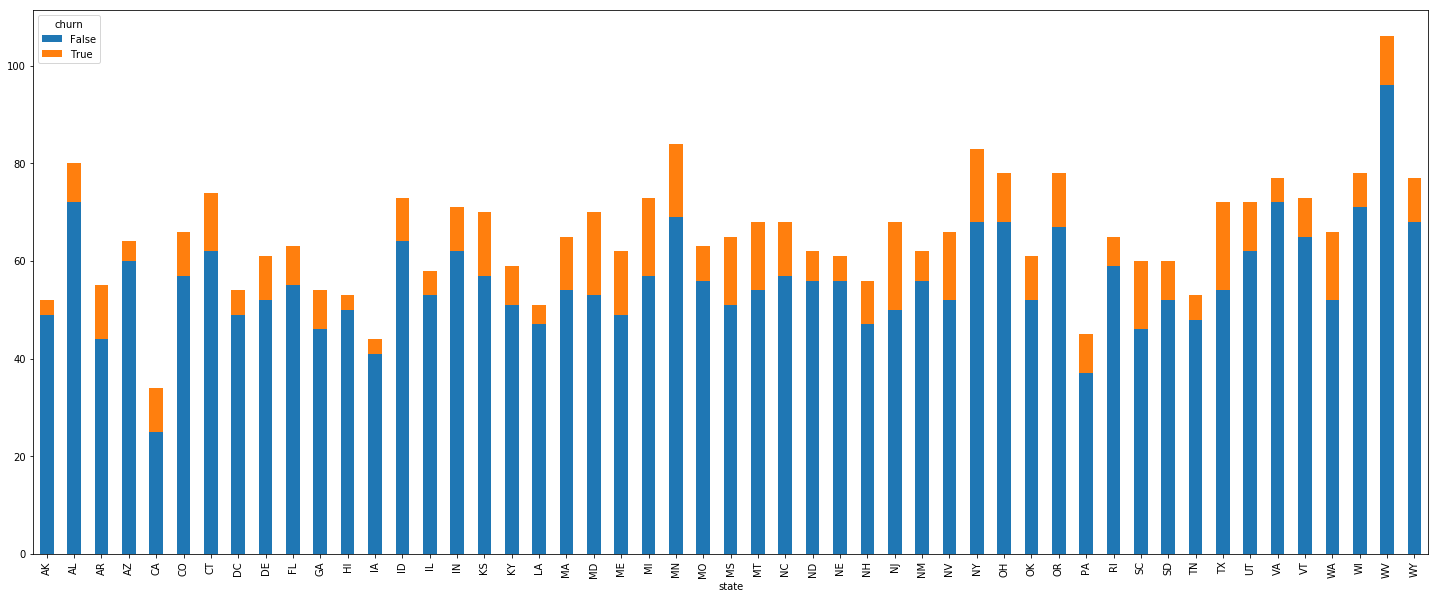

In [33]:
df.groupby(['state','churn']).size().unstack().plot(kind='bar', stacked=True,figsize = (25,10))

### Churn by Area code

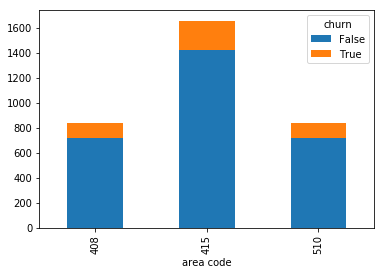

In [42]:
df.groupby(['area code', 'churn']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

### Churn by customers with international plan

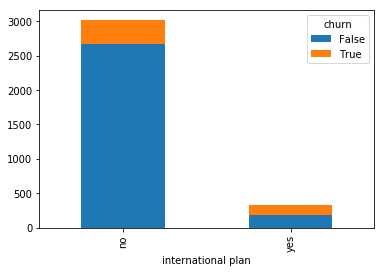

In [46]:
df.groupby(['international plan', 'churn']).size().unstack().plot(kind='bar', stacked= True)

### Churn by customers with voice mail plan

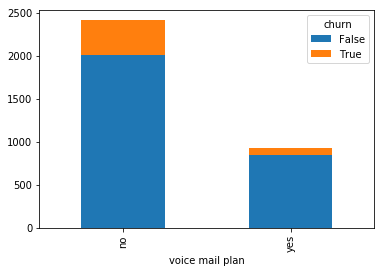

In [49]:
df.groupby(['voice mail plan', 'churn']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

### Handle categorical cols - Label encode

In [50]:
label_encoder = preprocessing.LabelEncoder()

In [53]:
df['state'].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: state, dtype: object

In [54]:
df['state'] = label_encoder.fit_transform(df['state'])

In [55]:
df['state'].head()

0    16
1    35
2    31
3    35
4    36
Name: state, dtype: int64

In [56]:
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [57]:
print(df.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [58]:
df.shape

(3333, 21)

In [59]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Strip of response values

In [62]:
y = df['churn']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [65]:
y = df['churn'].as_matrix().astype(np.int)
y

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y.size

3333

### Strip of redundant calls

In [68]:
df.drop(['phone number', 'churn'], axis = 1, inplace = True)

In [69]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Build feature matrix

In [70]:
X = df.as_matrix().astype(np.float)

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [71]:
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [72]:
X.shape

(3333, 19)

### Standardise feature matrix values

In [73]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [74]:
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

### Stratified cross validation since the response values are not balanced

In [76]:
def stratified_cv(X, y, clf_class, shuffle = True, n_folds = 10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds = n_folds, shuffle = shuffle)
    y_pred = y.copy()
    for i, j in stratified_k_fold:
        X_train, X_test = X[i], X[j]
        y_train = y[i]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[j] = clf.predict(X_test)
    return y_pred

### Builds models and train

In [79]:
print (f'Gradeint boosting classifier {round(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier)),2)}')
print (f'Support vector machines(SVM) {round(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC)),2)}')
print (f'Random forest classifier {round(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier)),2)}')
print (f'K nearest neigbhor classifier {round(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier)),2)}')
print (f'Logistic regression {round(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression)),2)}')

Gradeint boosting classifier 0.96
Support vector machines(SVM) 0.92
Random forest classifier 0.94
K nearest neigbhor classifier 0.89
Logistic regression 0.86


### Confusion matrix for various models

Text(0.5,1,'Gradient Boosting')

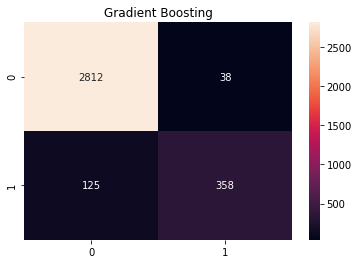

In [84]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y , ensemble.GradientBoostingClassifier))
# grad_ens_conf_matrix

sns.heatmap(grad_ens_conf_matrix,annot=True, fmt= '')
plt.title('Gradient Boosting')

Text(0.5,1,'SVM')

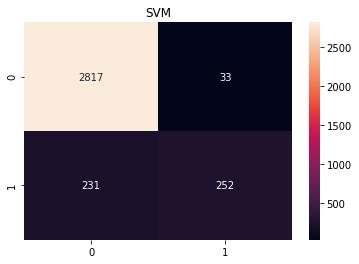

In [85]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y , svm.SVC))
# svm_svc_conf_matrix

sns.heatmap(svm_svc_conf_matrix,annot=True, fmt= '')
plt.title('SVM')

Text(0.5,1,'Random Forest')

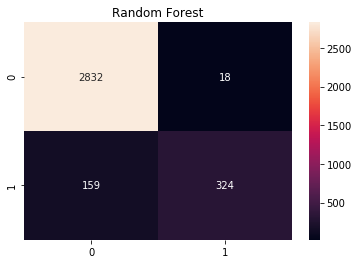

In [86]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y , ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix,annot=True, fmt= '')
plt.title('Random Forest')

Text(0.5,1,'KNN')

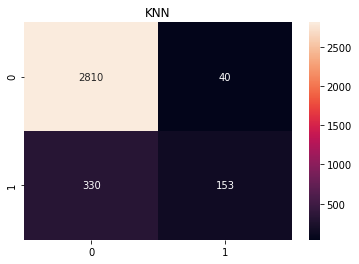

In [87]:
k_neigbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y , neighbors.KNeighborsClassifier))
sns.heatmap(k_neigbors_conf_matrix,annot=True, fmt= '')
plt.title('KNN')

Text(0.5,1,'Logistic regression')

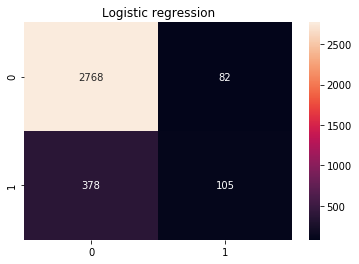

In [88]:
logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y , linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix,annot=True, fmt= '')
plt.title('Logistic regression')

### Classification report

In [100]:
print(f'GB : {metrics.classification_report(y,stratified_cv(X,y,ensemble.GradientBoostingClassifier))}')

GB :              precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.92      0.74      0.82       483

avg / total       0.95      0.95      0.95      3333



In [101]:
print(f'SBM : {metrics.classification_report(y,stratified_cv(X,y,svm.SVC))}')

SBM :              precision    recall  f1-score   support

          0       0.92      0.99      0.95      2850
          1       0.88      0.50      0.64       483

avg / total       0.92      0.92      0.91      3333



In [102]:
print(f'RB : {metrics.classification_report(y,stratified_cv(X,y,ensemble.RandomForestClassifier))}')

RB :              precision    recall  f1-score   support

          0       0.95      0.99      0.97      2850
          1       0.93      0.69      0.79       483

avg / total       0.95      0.95      0.94      3333



In [103]:
print(f'KNN : {metrics.classification_report(y,stratified_cv(X,y,neighbors.KNeighborsClassifier))}')

KNN :              precision    recall  f1-score   support

          0       0.90      0.99      0.94      2850
          1       0.81      0.34      0.48       483

avg / total       0.89      0.89      0.87      3333



In [104]:
print(f'LR : {metrics.classification_report(y,stratified_cv(X,y,linear_model.LogisticRegression))}')

LR :              precision    recall  f1-score   support

          0       0.88      0.97      0.92      2850
          1       0.55      0.21      0.30       483

avg / total       0.83      0.86      0.83      3333



### Final model selection

In [105]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Get feature importance from the classifier

[0.0234195  0.01617262 0.00782865 0.04244636 0.03083788 0.02775318
 0.10981617 0.03496499 0.12988005 0.0762257  0.01454909 0.08219252
 0.04313988 0.00723275 0.03510922 0.04987867 0.09741696 0.05094405
 0.12019177]


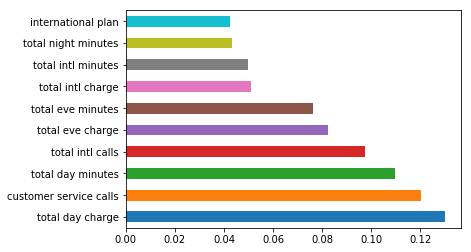

In [108]:
feature_importance = gbc.feature_importances_
print(feature_importance)

feat_importances = pd.Series(gbc.feature_importances_,index=df.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')

https://www.kaggle.com/sandipdatta/customer-churn-analysis